In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Context and Variable Details

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
* The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

**Our Goal is to predict wheather a person is diseased or not**

# Data Inspection

Import libraries

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

Read data

In [9]:
heartdf = pd.read_csv('Heart.csv')
heartdf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


check shape of data

In [10]:
heartdf.shape

(1025, 14)

check info

In [11]:
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Null value check

In [12]:
heartdf.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No null values in the dataframe

check statistical description of data

In [13]:
heartdf.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


check name of all variables

In [14]:
heartdf.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

created list of numerical variables

In [15]:
num_cols = list(heartdf.columns[0:len(heartdf.columns)-1])
num_cols.remove('sex')

# EDA

plot numerical variables

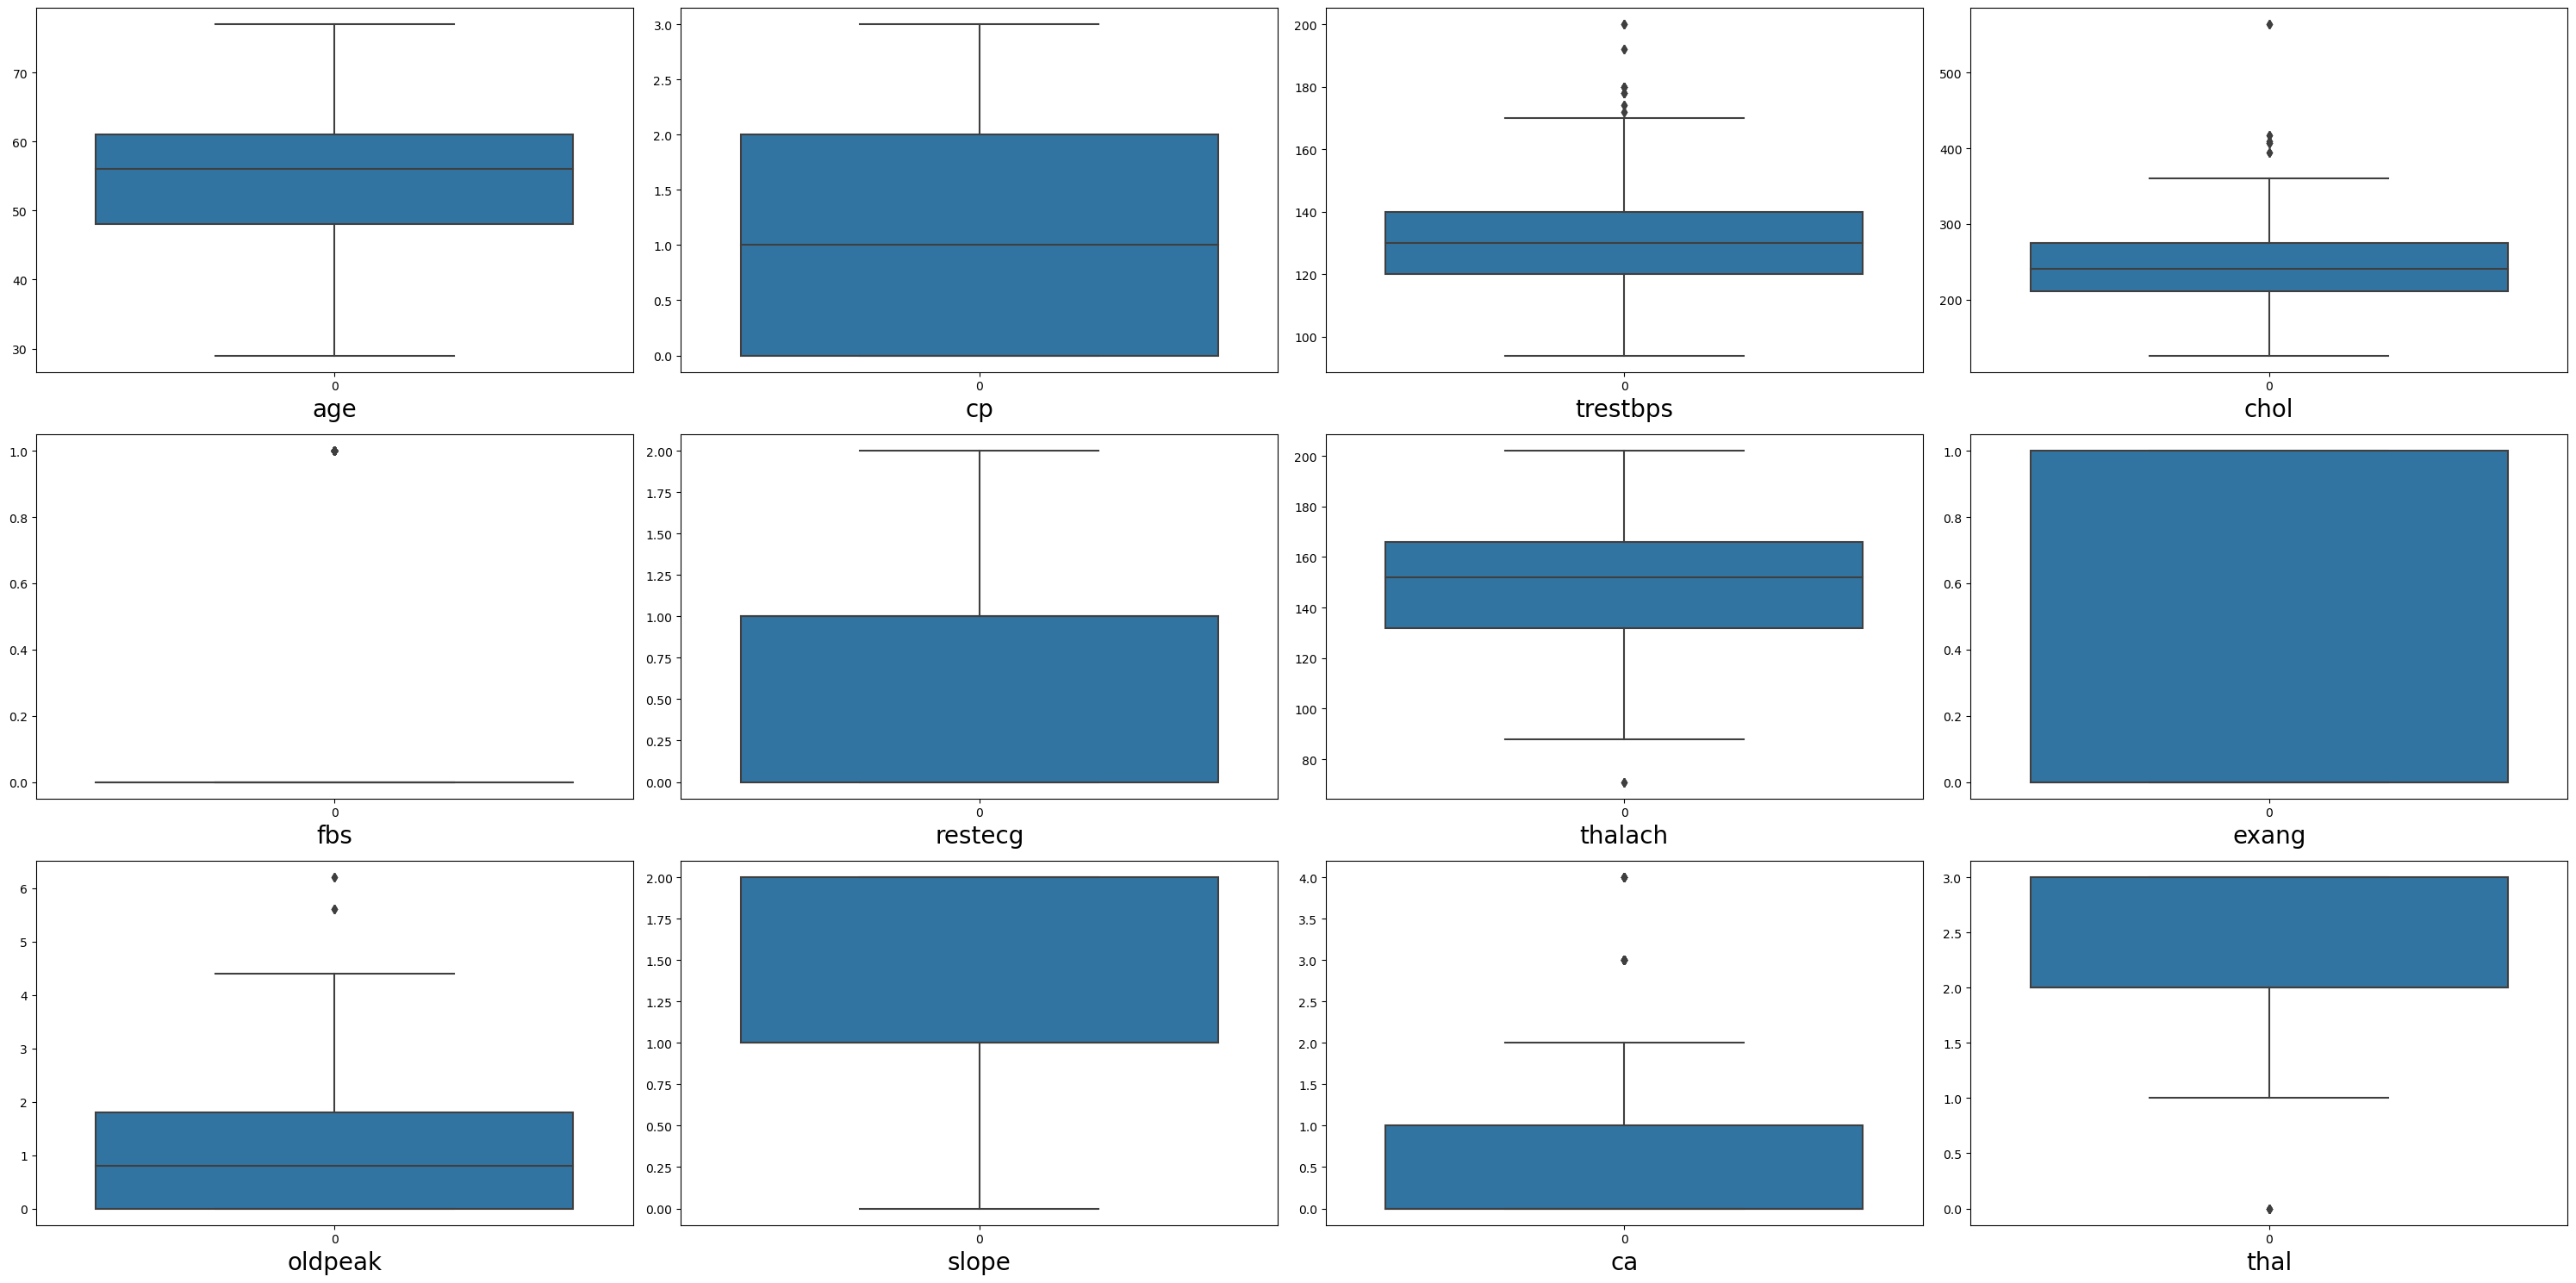

In [16]:
plt.figure(figsize=(30,15))
for i in enumerate(num_cols):
    plt.subplot(3,4,i[0]+1)
    ax = sns.boxplot(heartdf[i[1]])
    ax.set_xlabel(i[1],fontsize=20)

plt.tight_layout()
plt.show()

check for unique values in every variable

In [17]:
heartdf.nunique(axis=0)

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

plot distribution of numerical variables divided by targets

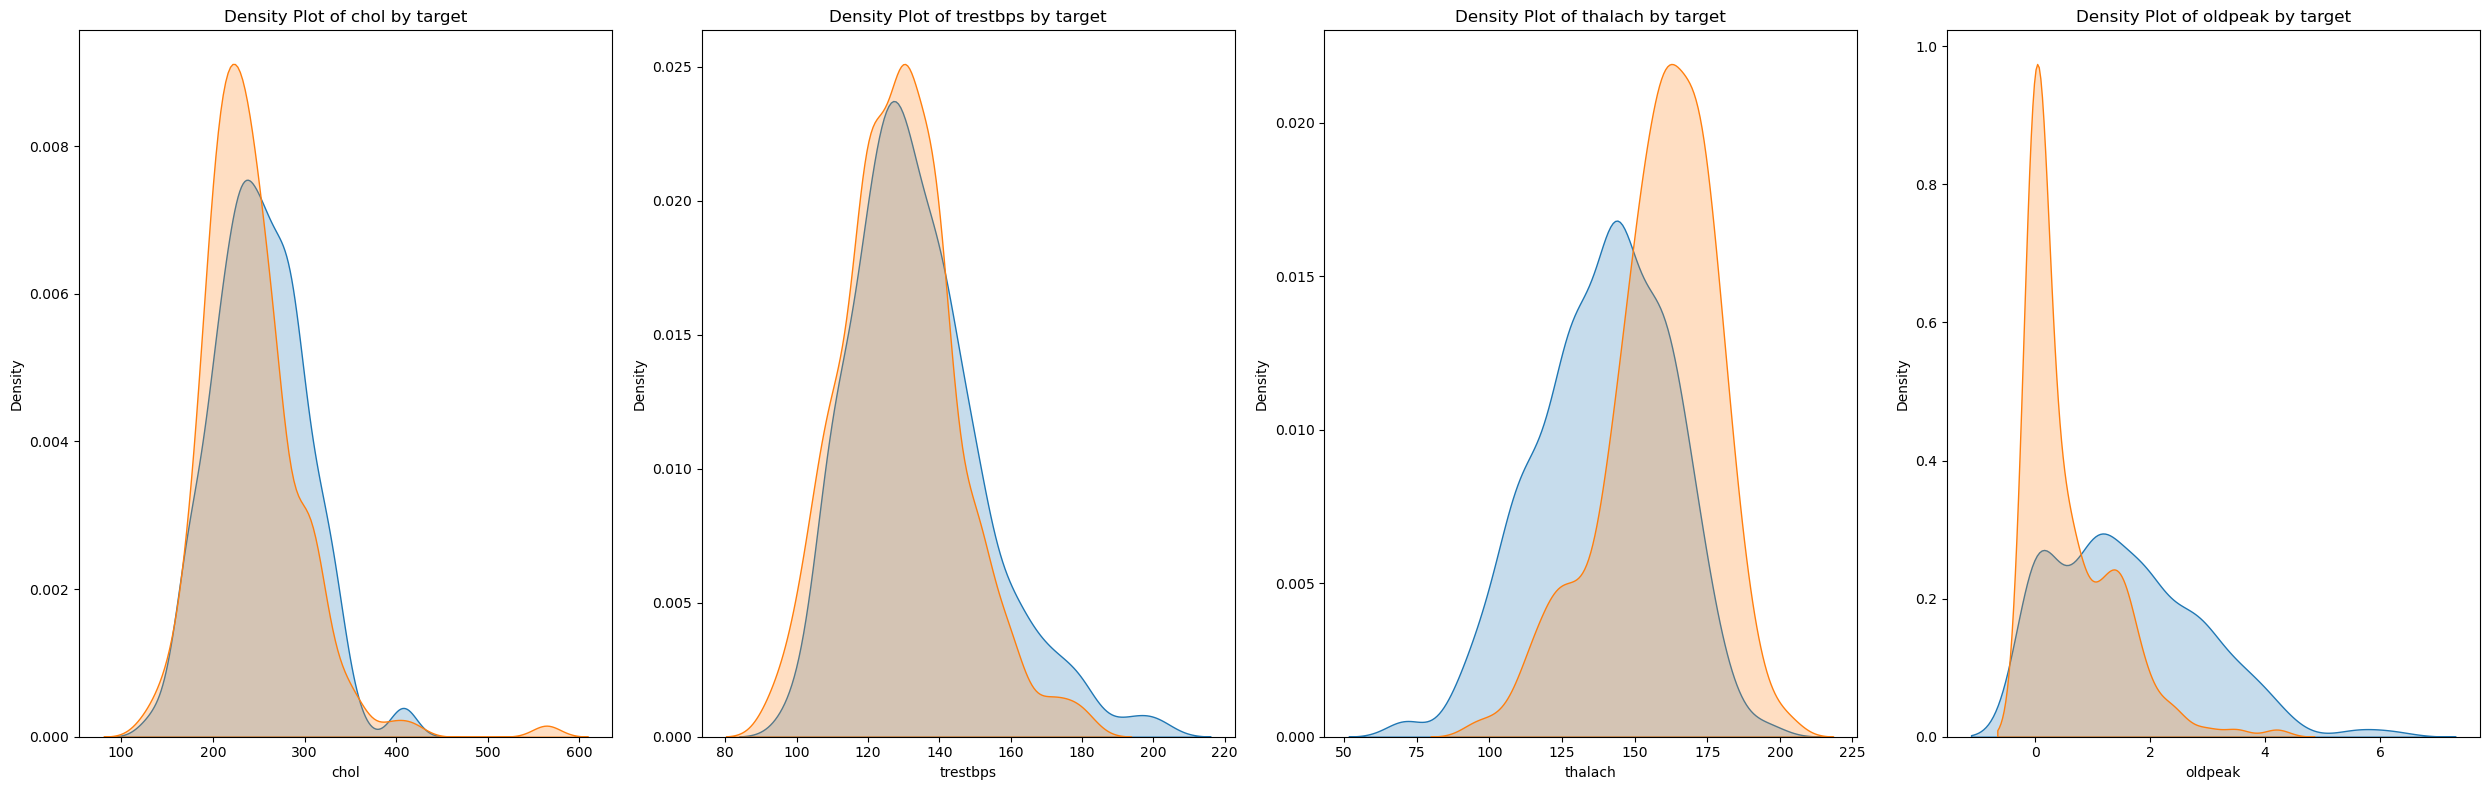

In [18]:
fig = plt.figure(figsize = (25, 8))


# ----------------------------------------------------------------------------------------------------
# plot the data
# the idea is to iterate over each class
# extract their data ad plot a sepate density plot
for i in heartdf["target"].unique():
    # extract the data
    x = heartdf[heartdf["target"] == i]["chol"]
    # plot the data using seaborn
    plt.subplot(1,4,1)
    sns.kdeplot(x, shade=True, label = "{} target".format(i))

# set the title of the plot
plt.title("Density Plot of chol by target")

# ----------------------------------------------------------------------------------------------------
# plot the data
# the idea is to iterate over each class
# extract their data ad plot a sepate density plot
for i in heartdf["target"].unique():
    # extract the data
    x = heartdf[heartdf["target"] == i]["trestbps"]
    # plot the data using seaborn
    plt.subplot(1,4,2)
    sns.kdeplot(x, shade=True, label = "{} target".format(i))

# set the title of the plot
plt.title("Density Plot of trestbps by target")

# ----------------------------------------------------------------------------------------------------
# plot the data
# the idea is to iterate over each class
# extract their data ad plot a sepate density plot
for i in heartdf["target"].unique():
    # extract the data
    x = heartdf[heartdf["target"] == i]["thalach"]
    # plot the data using seaborn
    plt.subplot(1,4,3)
    sns.kdeplot(x, shade=True, label = "{} target".format(i))

# set the title of the plot
plt.title("Density Plot of thalach by target")

# ----------------------------------------------------------------------------------------------------
# plot the data
# the idea is to iterate over each class
# extract their data ad plot a sepate density plot
for i in heartdf["target"].unique():
    # extract the data
    x = heartdf[heartdf["target"] == i]["oldpeak"]
    # plot the data using seaborn
    plt.subplot(1,4,4)
    sns.kdeplot(x, shade=True, label = "{} target".format(i))

# set the title of the plot
plt.title("Density Plot of oldpeak by target")

plt.tight_layout()
plt.show()

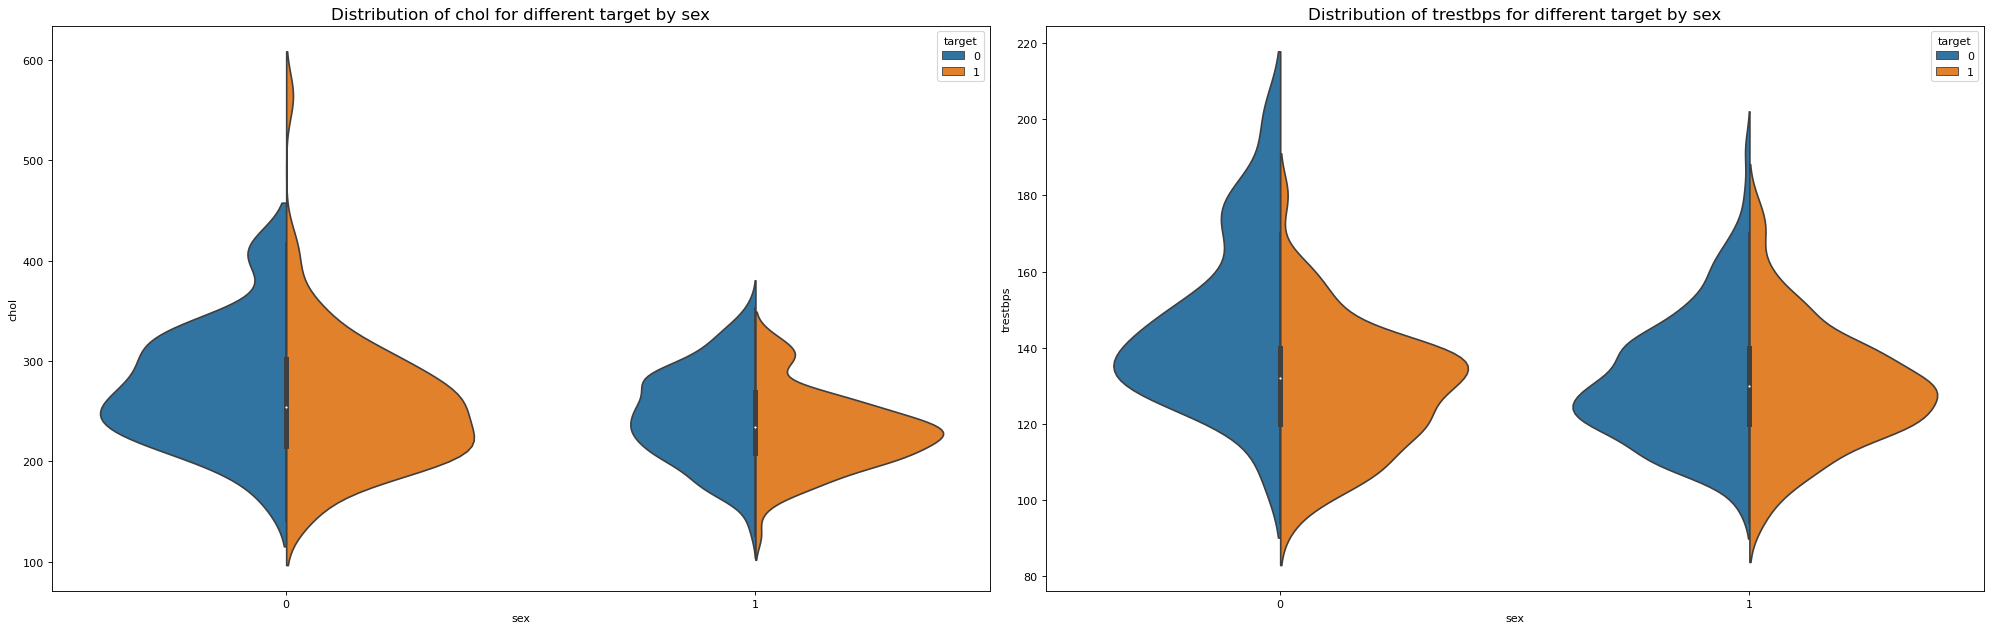

In [19]:
## plot the data based on different target to show the ditribution of chol and trestbps as per different sex

plt.figure(figsize=(25,8),dpi=80)
plt.subplot(1,2,1)
ax = sns.violinplot(x = "sex", y = "chol", hue = "target", split = True, data = heartdf)
ax.set_title('Distribution of chol for different target by sex', fontsize = 15)

plt.subplot(1,2,2)
ay = sns.violinplot(x = "sex", y = "trestbps", hue = "target", split = True, data = heartdf)
ay.set_title('Distribution of trestbps for different target by sex', fontsize = 15)

plt.tight_layout()
plt.show()

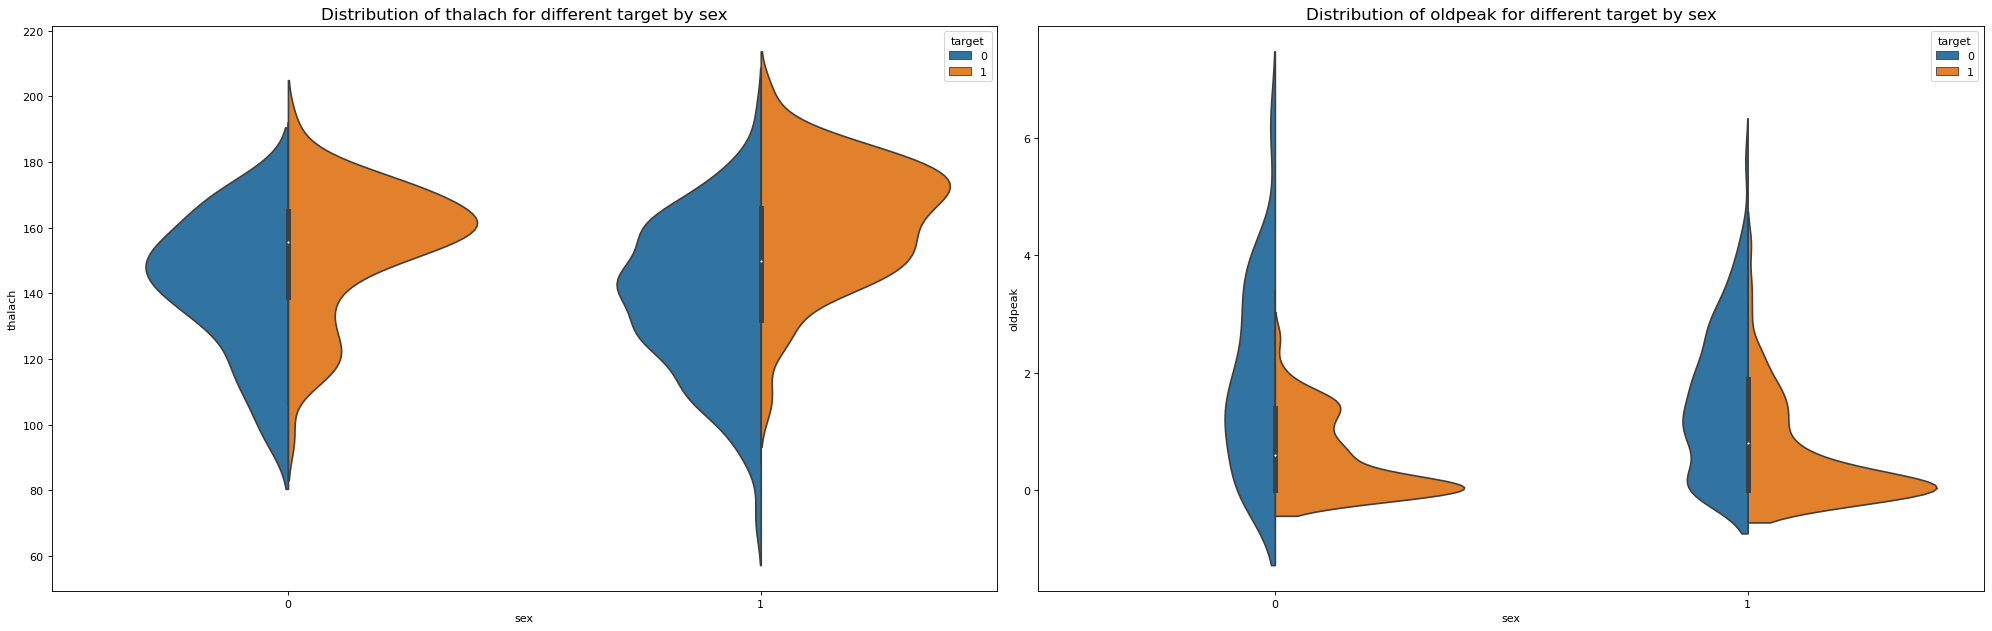

In [20]:
## plot the data based on different target to show the ditribution of thalach and oldpeak as per different sex


plt.figure(figsize=(25,8),dpi=80)
plt.subplot(1,2,1)
ax = sns.violinplot(x = "sex", y = "thalach", hue = "target", split = True, data = heartdf)
ax.set_title('Distribution of thalach for different target by sex', fontsize = 15)

plt.subplot(1,2,2)
ay = sns.violinplot(x = "sex", y = "oldpeak", hue = "target", split = True, data = heartdf)
ay.set_title('Distribution of oldpeak for different target by sex', fontsize = 15)

plt.tight_layout()
plt.show()

**comments**

* Maximum number of patience those who have heart disease have chol around 200-300
* Maximum number of patience those who don't have heart disease have chol kind of same
* Maximum number of patience those who have heart disease have trestbps around 120-140
* Maximum number of patience those who don't have heart disease have trestbps kind of same
* Those who have heart disease have more thalach
* Those who don't have heart disease have more oldpeak
* Diseased females have more chol
* Maximum diseased male have lower chol
* Not diseased females have more trestbps rather than male
* Diseased males have slightly more thalach than females
* Diseased males and females have less oldpeak rather than females


created list of categorical variables

In [21]:
cat_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

created different dataframe for deceased and not deceased

In [22]:
heart_des = heartdf[heartdf['target']==1]
heart_notdes = heartdf[heartdf['target']==0]

plot distribution of every unique value of categorical columns for those who have deceased

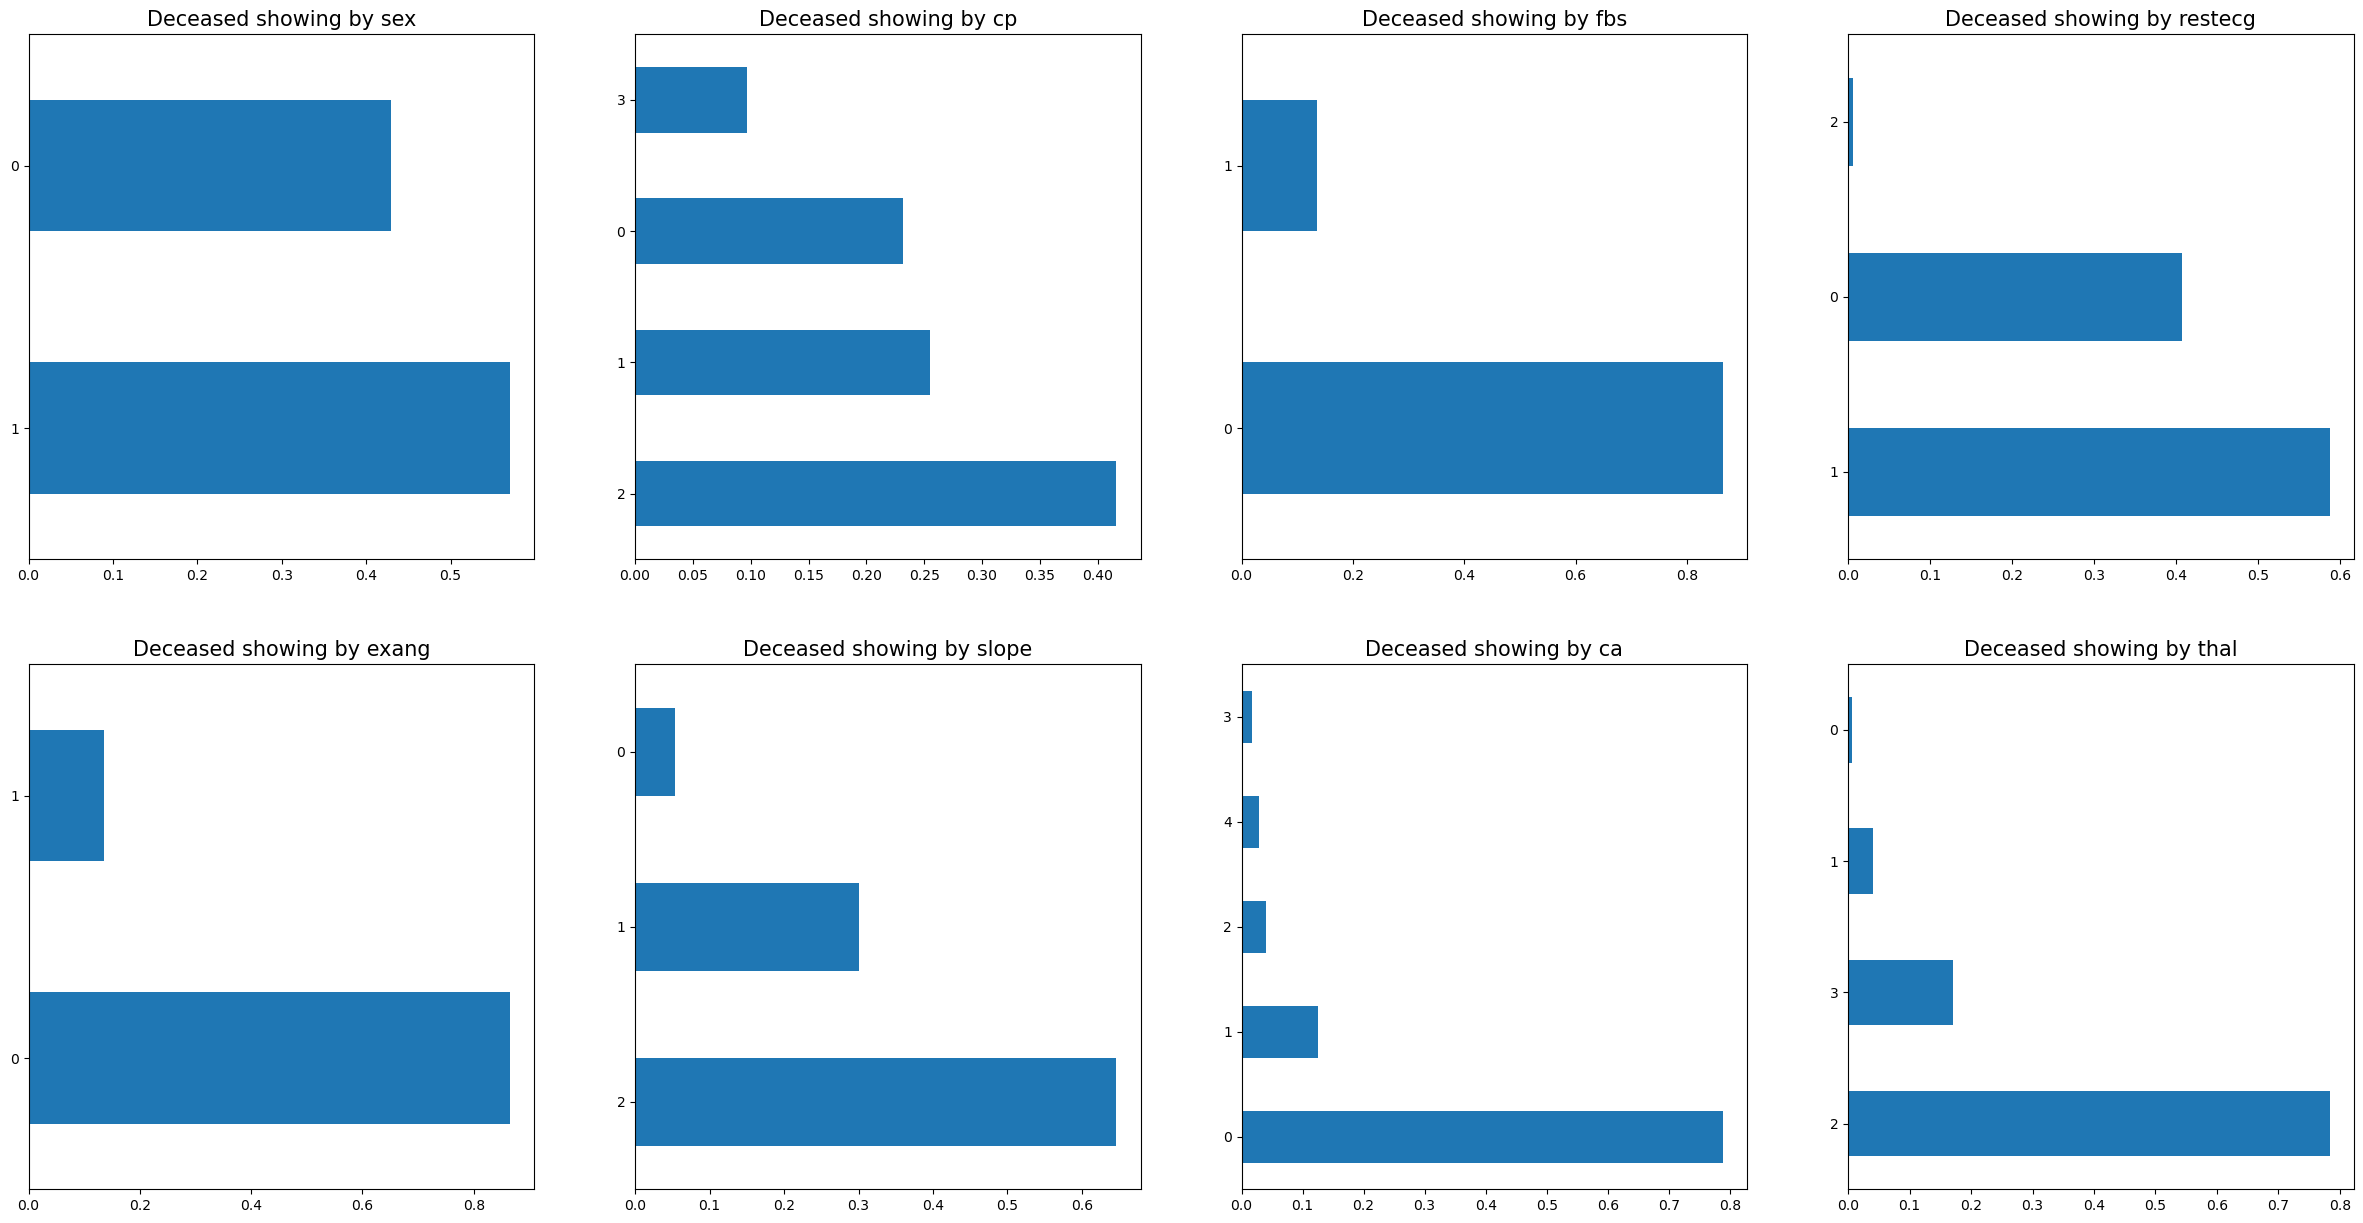

In [23]:
plt.figure(figsize=(30,15))
for i in enumerate(cat_cols):
    plt.subplot(2,4,i[0]+1)
    ax = heart_des[i[1]].value_counts(normalize=True).plot.barh()
    ax.set_title("Deceased showing by "+i[1],fontsize=15)
plt.show()

**comments:**
* Males are more deceased than females
* Deceased having higher cp
* Deceased having lower fbs
* Maximum deceased having restecg as 1
* Deceased having lower exang
* Deceased having higher slope
* Deceased having lower ca
* Deceased having higher thal

plot distribution of every unique value of categorical columns for those who have deceased

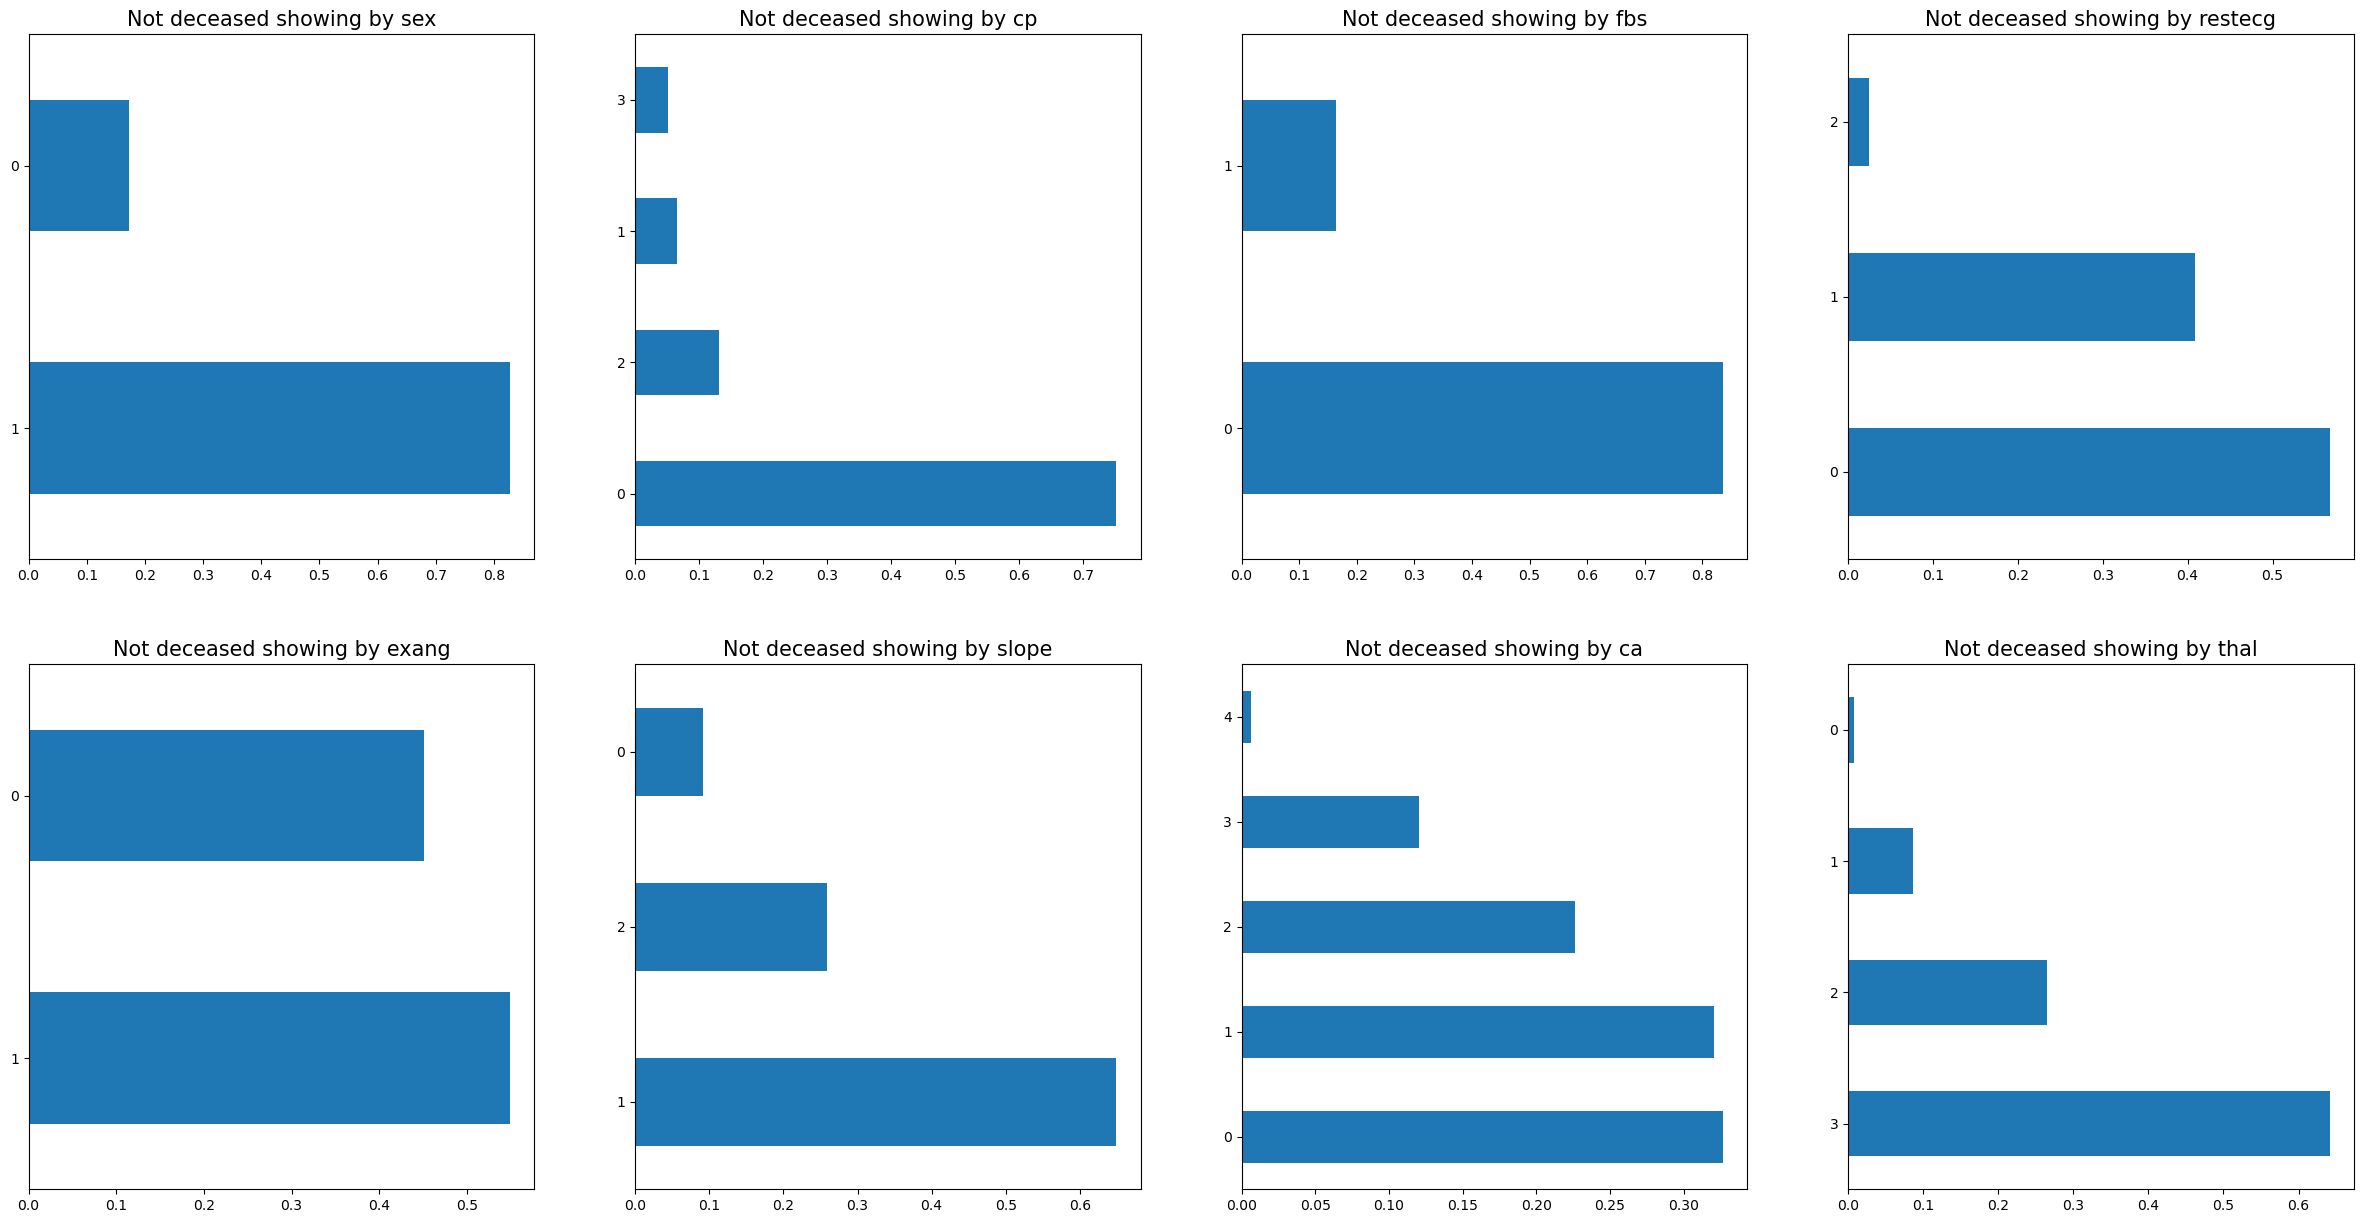

In [24]:
plt.figure(figsize=(30,15))
for i in enumerate(cat_cols):
    plt.subplot(2,4,i[0]+1)
    ax = heart_notdes[i[1]].value_counts(normalize=True).plot.barh()
    ax.set_title("Not deceased showing by "+i[1],fontsize=15)
plt.show()

**comments:**
* Males are more not deceased than males
* not Deceased having lower cp
* not Deceased having lower fbs
* not deceased having lower restecg 
* not Deceased having higher exang
* not Deceased having higher slope
* maximum not Deceased having ca as 1
* not Deceased having higher thal

# Model Building

divided train and test set

In [25]:
df_train,df_test = train_test_split(heartdf,train_size=0.7,random_state=50)

divided x and y of train data

In [26]:
y_train = df_train.pop('target')
X_train = df_train

divided x an y of test data

In [27]:
y_test = df_test.pop('target')
X_test = df_test

In [28]:
## creat function for check train and test set
def check_model(dt):
    print("train confusion matrix : ",confusion_matrix(y_train,dt.predict(X_train)))
    print("train accuracy score : ",accuracy_score(y_train,dt.predict(X_train)))
    print("__"*50)
    print("test confusion matrix : ",confusion_matrix(y_test,dt.predict(X_test)))
    print("test accuracy score : ",accuracy_score(y_test,dt.predict(X_test)))    
    

In [29]:
dt_default = DecisionTreeClassifier(random_state=0)
dt_res = dt_default.fit(X_train,y_train)

check our default model

In [30]:
check_model(dt_res)

train confusion matrix :  [[354   0]
 [  0 363]]
train accuracy score :  1.0
____________________________________________________________________________________________________
test confusion matrix :  [[142   3]
 [  6 157]]
test accuracy score :  0.9707792207792207


In [31]:
## create function to visualize graphs

def tree_graph(dt):

    fig = plt.figure(figsize=(25,20))

    dt_plot = tree.plot_tree(dt,feature_names=X_train.columns,class_names=['Not Deceased','Deceased'],filled=True)

check graph of our default model

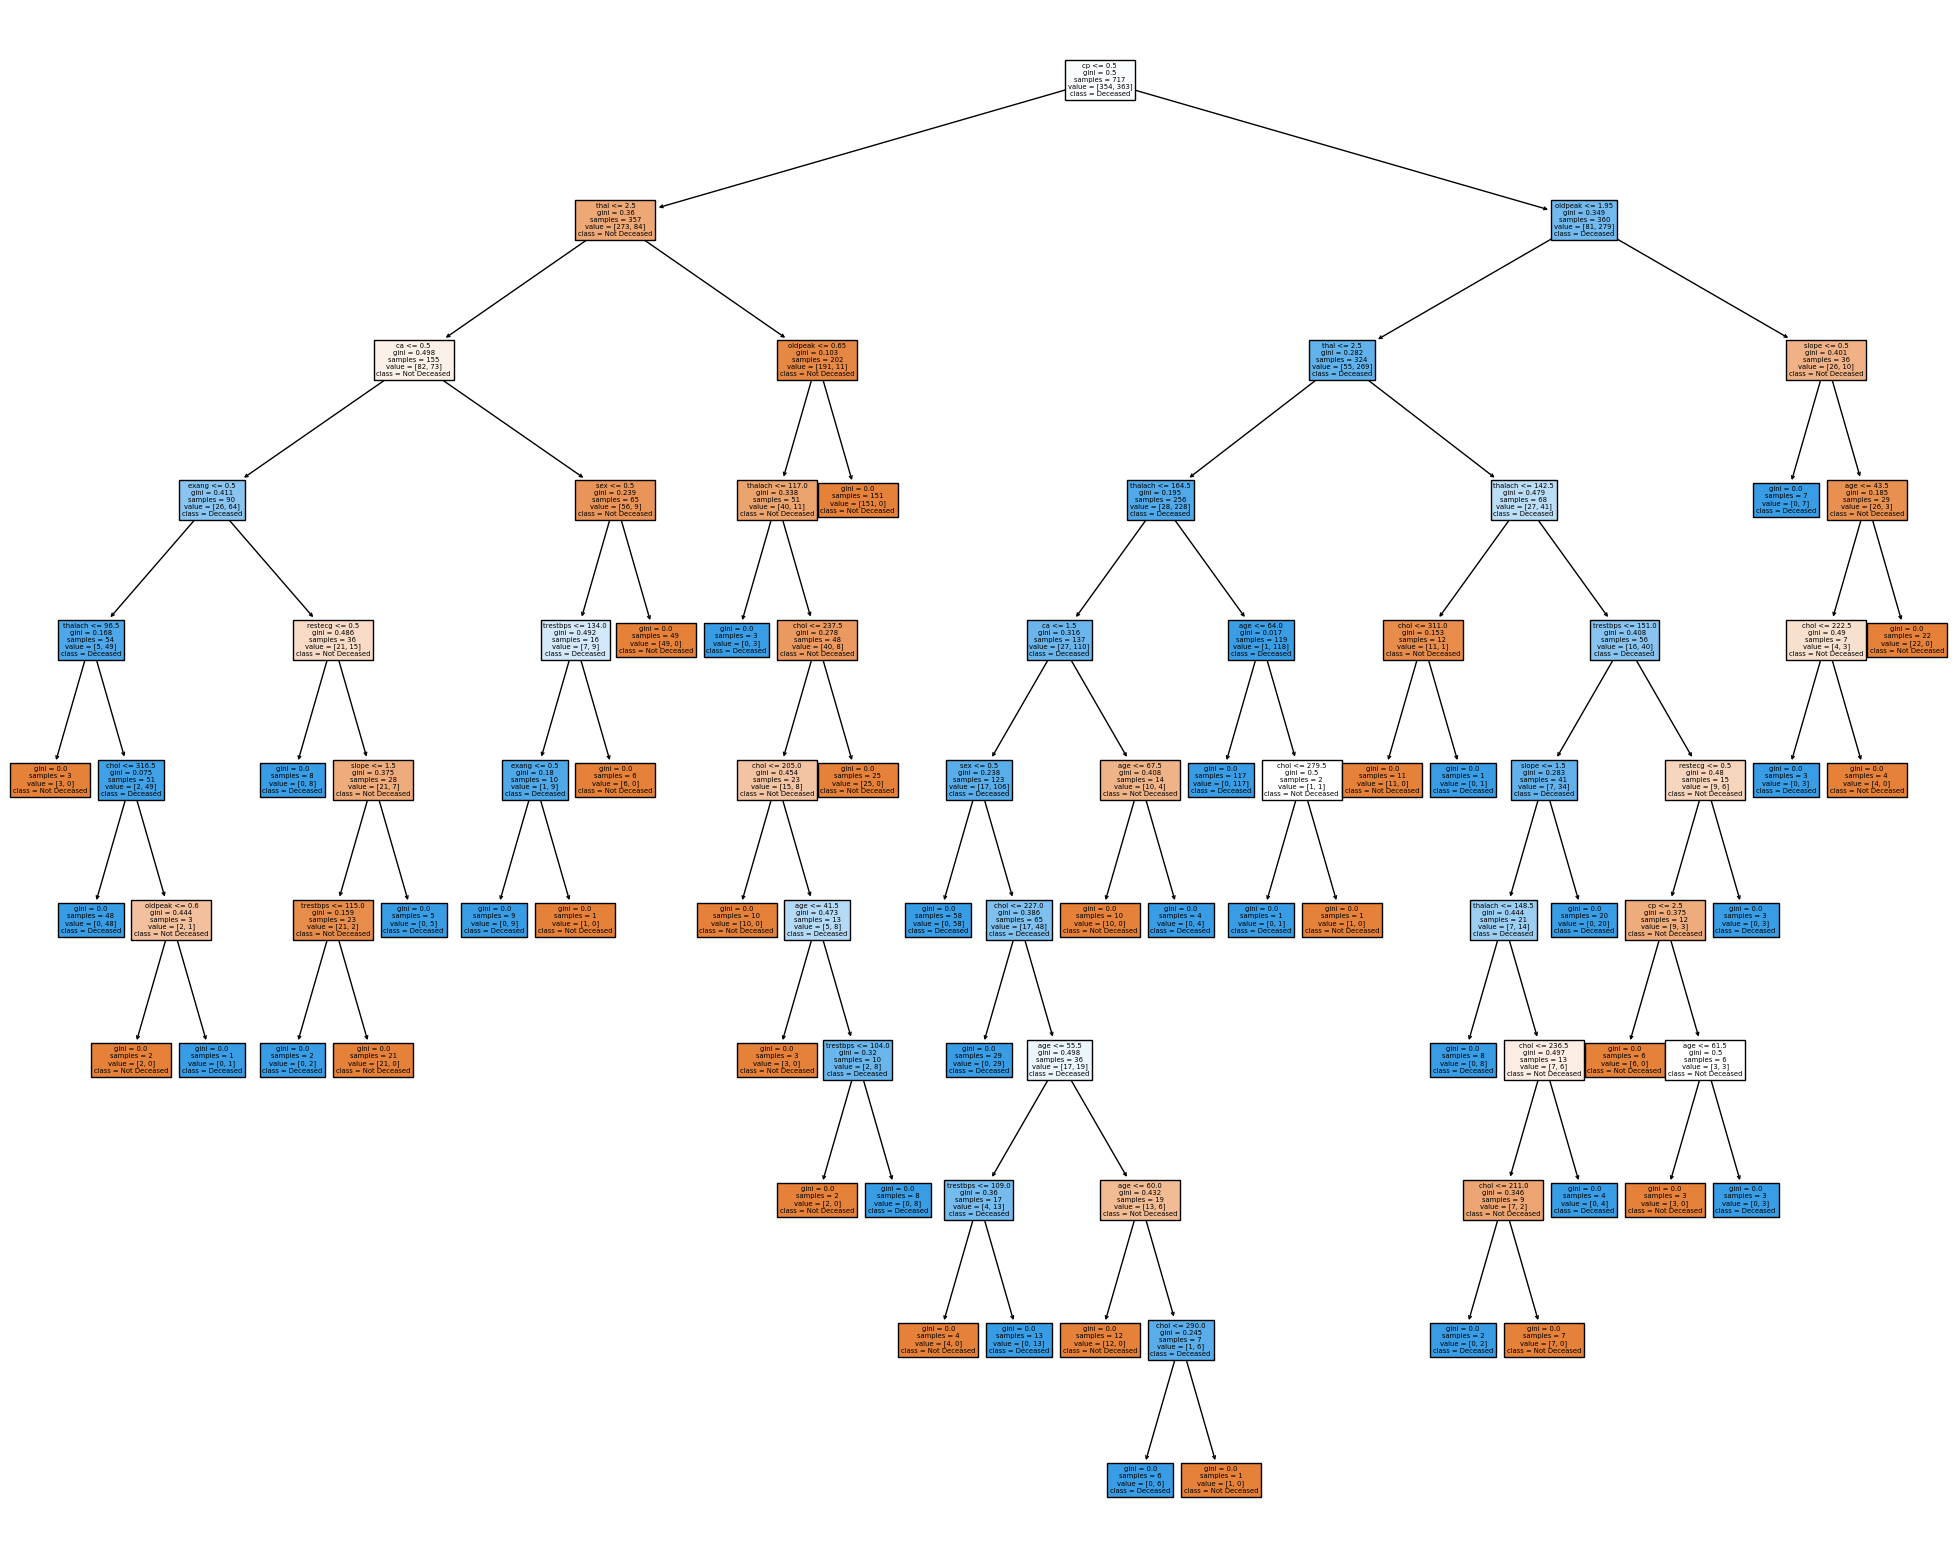

In [32]:
tree_graph(dt_res)

# Hyper parameter Tuning using Grid Search 

**GRID SEARCH**

Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. This is significant as the performance of the entire model is based on the hyper parameter values specified.

For more information check the following link : https://medium.com/datadriveninvestor/an-introduction-to-grid-search-ff57adcc0998

In [33]:
params = {'max_depth':[2,3,4,5,6,7,8,9,10],
          'min_samples_split':[5,10,25,50,75,100,150]}

In [34]:
grid_search = GridSearchCV(estimator=dt_default,param_grid=params,scoring='accuracy',n_jobs=-1,verbose=1) ## create grid search object

In [35]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [5, 10, 25, 50, 75, 100, 150]},
             scoring='accuracy', verbose=1)

choseing the best estimator from our estimators

In [36]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=0)

In [37]:
best_dt = grid_search.best_estimator_

# Final Model

check the best model with test data

In [38]:
check_model(best_dt)

train confusion matrix :  [[354   0]
 [  2 361]]
train accuracy score :  0.99721059972106
____________________________________________________________________________________________________
test confusion matrix :  [[139   6]
 [ 10 153]]
test accuracy score :  0.948051948051948


plotting of our best model

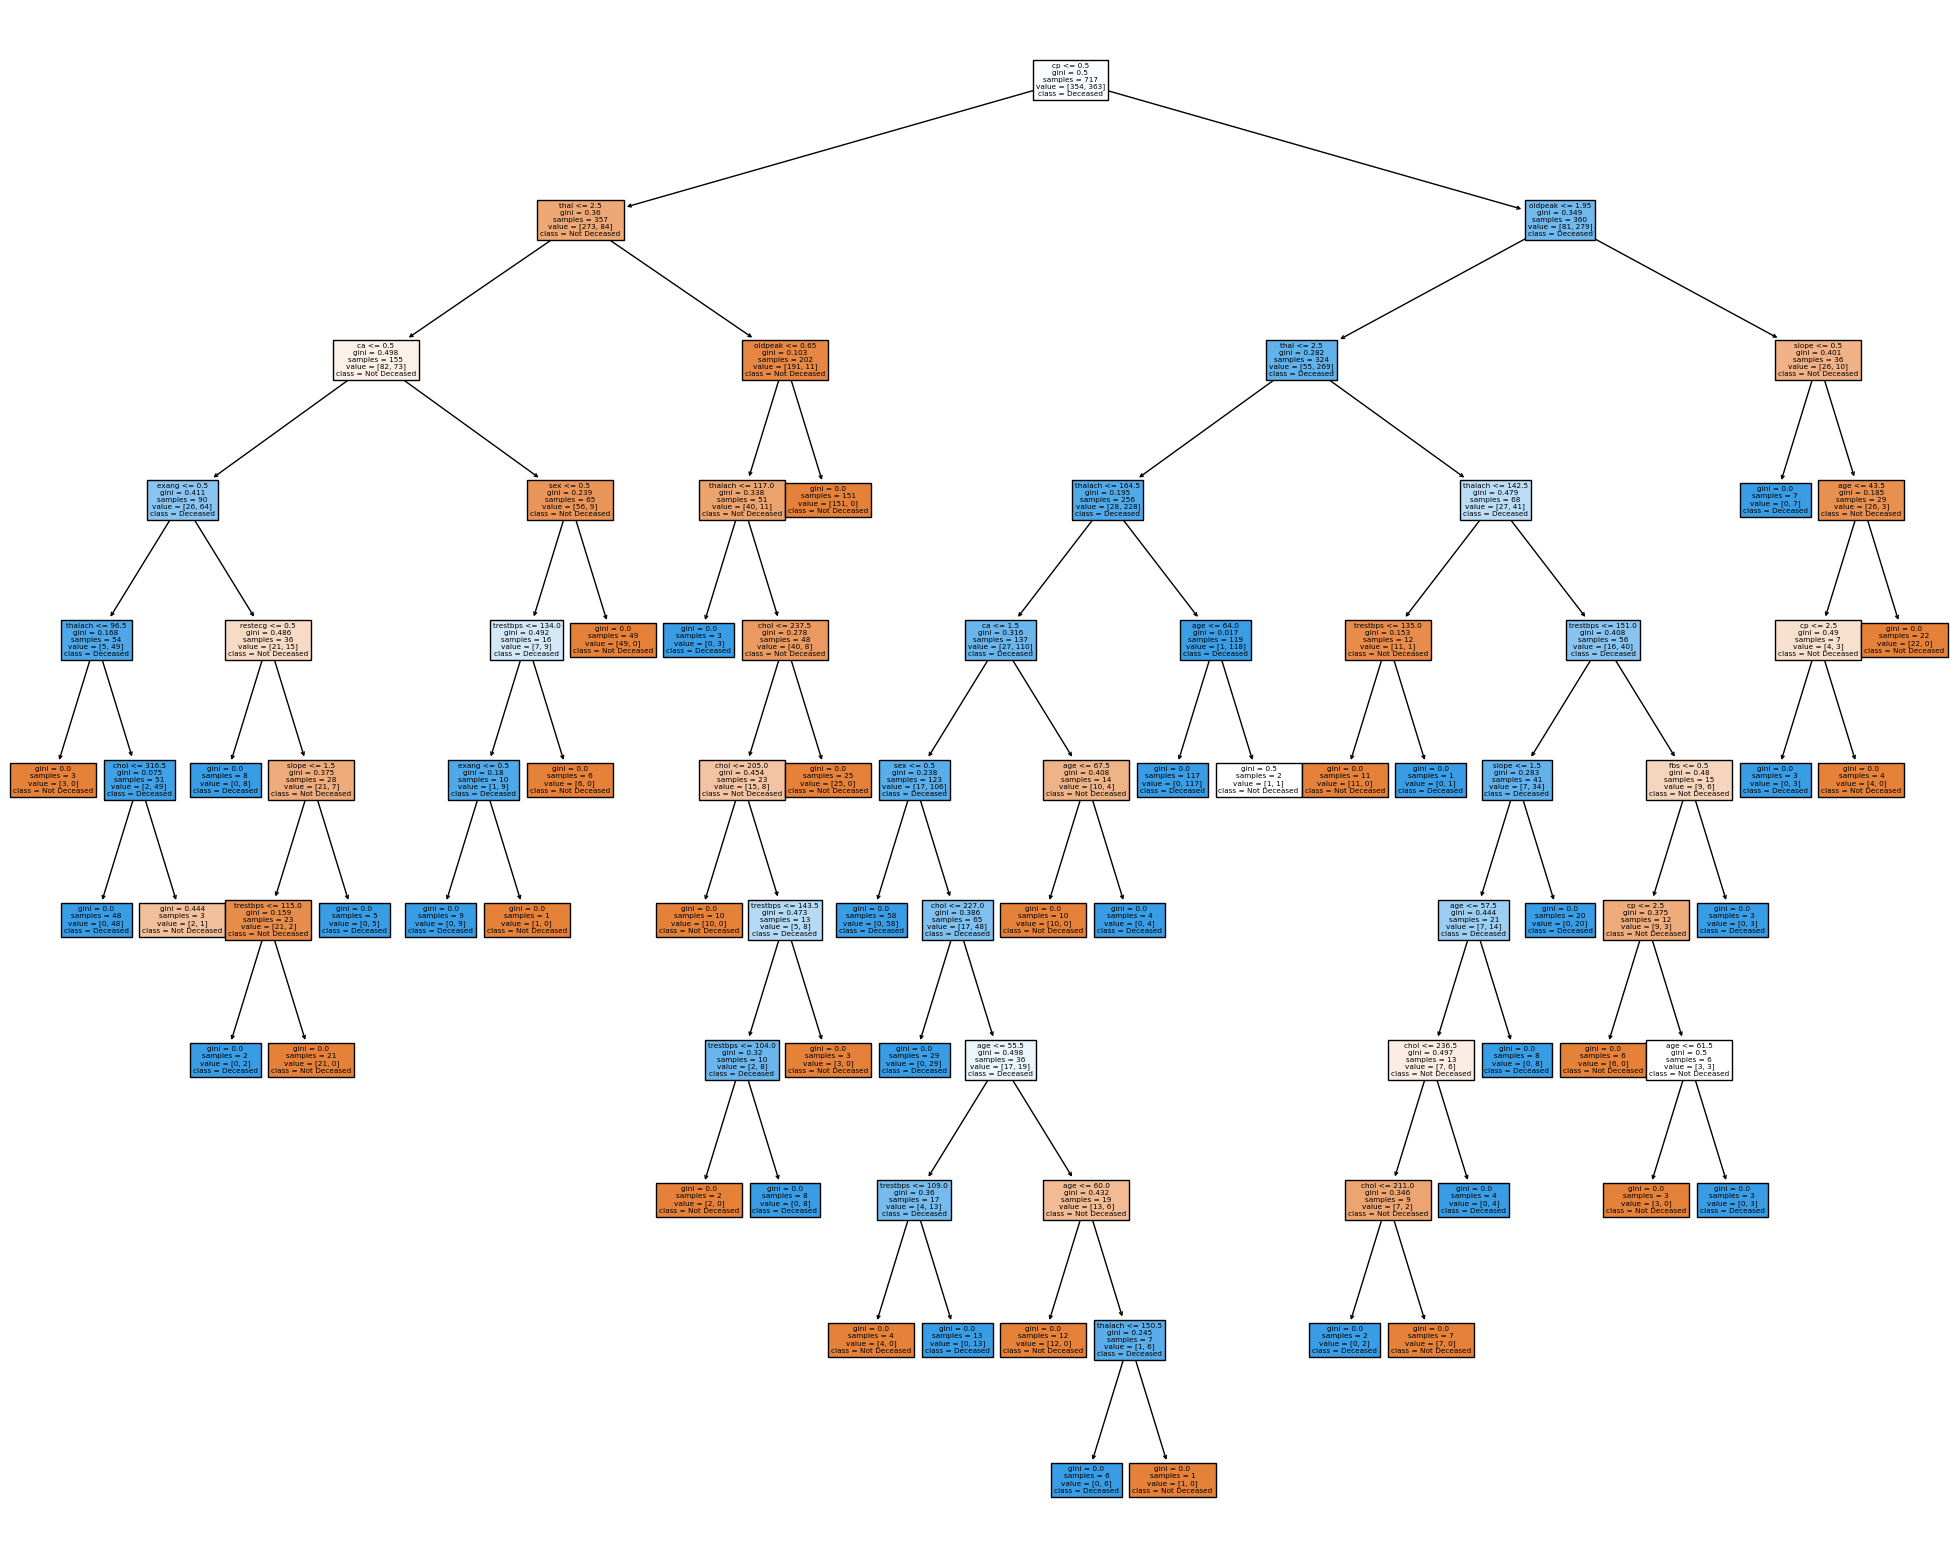

In [39]:
tree_graph(best_dt)